## Topics covered in this notebook:
1. What are Decision Trees?
2. What is Information Entropy?
3. What is Information Gain?
4. How do we choose best split?
5. What makes a good tree?
6. Decision Trees vs KNN.
7. Applications.
8. References.

# 1. Decision Trees:

Simple in concept, complicated to implement.

1. Pick an attribute, do a simple test.
2. Conditioned on choice, pick another attribute, do another test.
3. In the leaves, assign a class with majority vote.
4. Do the other branches as well.
5. Gives axis aligned decision boundaries.

Basically: A bunch of nested if-statements.

Example - Spam Classifier:

$If (doc\,contains\,'money'\,):$<br>
    $\quad If\,(doc\,contains\,'free'\,):$<br>
        $\qquad Return\,\,True$ <br>
    $\quad else:$<br>
        $\qquad Return\,\,False$ <br>
$else:$<br>
    $\quad Return\,\,False$ <br>
    
1. One key feature is that we look at one attribure at a time.
    1. Each condition checks only one column of X.
    2. Attributes = 'Input Features'.
    3. Ex:
        1. If (height < 5): Go to left node Else: Go to right node.

2. What does it tell us about the geometry of the problem?
    1. Splits are always orthogonal to the axes.
    2. Whereas discriminating line can be at an angle - Ex. Linear Classifier.
    3. Can still get a highly non-linear boundary - if we split multiple times, splits at each level.
    
3. Recursiveness- Because its a Tree!.
    1. Each node is a TreeNode object.
    2. But its children are also TreeNode objects.
    3. Leaf nodes have no children.
    4. Leaf nodes are where we make predictions.
    5. It then bubbles back up to the root node.
    
What makes this ML?

1. Its how we choose the conditions.
    1. Based on Information theory.

##  2. Information Entropy:

High level: We want to choose a split that maximizes reduction in uncertainity.<br>

Example: Going from 50% certain to 100% certain is better than going from 50% to 75%

1. Related to variance.
    1. Wide variance: More uncertainity. 
    2. Slim variance: Less uncertainity. <img src="Images/Variance.png" alt="Drawing" style="width: 500px;"/>

2. Entropy: 
    1. It is always positive. Since p is between 0-1 and negative log is also positive.
    2. Entropy - We always mean log base 2 implicity.

$\qquad H(X) = -\displaystyle\sum_{x} p(x)\log p(x).$


### Binary Random variable:
Example:<br>
P(X = 1) = p<br>
P(X = 0) = 1 - p<br>

$$Entropy\,H(p)\,=\,-plog(p)\,-\,(1-p)log(1-p)$$<br>
What value of p maximizes p? Solve dH/dp = 0 for p.<br>
Answer: p = 0.5

<img src="Images/EntropyVsP.png" alt="Drawing" style="width: 250px;"/>

1. If p = 0.5, there is no possible way to make a good prediction, we'll always have a probability of 50% being wrong.
2. If p = 0.8, then we should always predict 1 because that gives us the best chance of being correct.
3. Entropy is a measure of how much information we get from finding out the value of the random variable.
    1. If we flip a coint with p = 0.8 and we get heads(1), we don't gain much information, we were already 80% certain.
    2. If we flip a coint with p = 0.5 and we get heads, we gain maximium amount of information we could have.
    3. Prior to knowing this, we were maximally clueless about the value we would get.
    4. In general, uniform distribution yields maximum entropy.

## 3. Information Gain:

What is Information Gain?
1. Suppose we have labels 0,0,1,1.
2. H(Y) = 1.
3. Suppose we have an attribute that splits the data perfectly.
    1. Ex: if X > 0, Y = 0 ,if X < 0, Y = 1.
    2. Then we have the left nodes: Y_left = {0,0}.
    3. Right nodes: Y_right = {1,1}.
    4. The entropy for each subset of data is 0.
    5. Information Gain, IG(Y|Split on X) = H(Y) - 0.5* H(Y_left) - - 0.5* H(Y_right) = 1 - 0 - 0 = 1.
        1. 0.5 indicates half the data went to the left and half to the right.
        2. Ensures IG>=0.
        
Another Example:
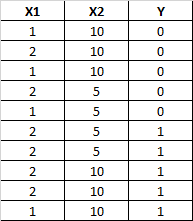
1. H(Y) = 1.
2. Split X1:
    1. X1 = 1: H(Y|X1=1) = - (3/4)log2(3/5) - (1/4)log2(1/4) = 0.811.
    2. X1 = 2: H(Y|X1=2) = - (2/6)log2(2/6) - (4/6)log2(4/6) = 0.918.
    3. IG = 1 - (4/10) * 0.811 - (6/10) * 0.918 = 0.1248.
3. Split X2:
    1. X2 = 5: H(Y|X2=5) = 1.
    2. X2 = 10: H(Y|X2=10) = 1.
    3. IG = 1 - (4/10) * 1 - (6/10) * 1 = 0.

Since splitting across X1 gives maximum IG, we should split on X1 first.

## 4. Choosing the best split:
1. In the example above X1 & X2 had only 2 values.
2. But in datasets like MNIST, the data is continuous. How do we pick the best split?
    1. Continuous data -> Infinite places to split.
    2. Need some way to find smalles number of splits.
    
Rules:<br>

 X : 0 1 2 3<br>
 Y : 1 0 1 0<br>
 
We only need to consider the midpoint between any two sorted X's.<br>
Split between 1,2 -> 1.5 -> Entropy = 1<br>
Split between 1,2 -> 1.75 -> Entropy still = 1<br>

Only need to consider boundaries between differing labels:<br>

Y: 1,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0

Split at the middle -> total entropy = 2 * (-(6/8)log2(6/8) - (2/8)log2(2/8)) = 1.62.<br>
Move one left       -> total entropy = 1.78.<br>
Move one more left  -> total entropy = 1.89.<br>

Further from boundary -> higher entropy -> lower information gain.
 


### Best Split Algorithm:
1. Sort X's for current column in order, sort Y in the corresponding way.
2. Find all the boundary points where Y changes from one value to another.
3. Calculate information gain when splitting at each boundary.
4. Keep the split that yields max. information gain.

## 5. What makes a good tree?
1. Not too small: need to handle important but possible subtle disctinctions in data.
2. Not too big:
    1. Computational efficiency - avoid redundant attributes.
    2. Avoid over-fitting training examples.
3. **Occam's Razor**: Find the simples hypothesis (smallest tree) that fits the observations.
4. Inductive bias: small trees with informative nodes near the root.
5. In practice, one often regilarizes the construction process to try to get small but highly informative trees.

### Problems:
1. Exponentially less data at lower nodes.
2. Too big of a tree can overfit the data.
3. Greedy algoritms don't necessarily yield the global optimum.
4. Not suited for continous attributes.
5. Bad on parity(XOR) & majority fucntions.

## 6. Decision Trees vs. KNN:
1. Decision boundaries are axis-alignes, tree structures whereas in KNN it is piecewise linear.
2. Test complexity: Attributes & splits whereas in KNN it is non-parametric.

## 7. Applications:
1. Used in XBOX to classify body parts. Depth image -> body parts -> 3D joint proposals.
2. Flight simulators: 20 state variables, 90K examples based on expert pilot's actions; auto-pilot tree.
3. Yahoo's ranking challenge.

## 8. References:
1. An Introduction to Statistical Learning Textbook by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.
2. University of Michigan EECS 445 - Machine Learning Course (https://github.com/eecs445-f16/umich-eecs445-f16).<br>
3. University of Toronto CSC 411 - Intro. to Machine Learning (http://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/CSC411_Fall16.html).<br>
4. Stanford CS109 - Intro. to proabability for computer scientists (https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/). <br>
5. Few online courses on Udemy, Coursera etc.